# Read DEAP data
[Deap Detail](http://www.eecs.qmul.ac.uk/mmv/datasets/deap/readme.html#prep)

[The Bimodal Paper](https://www.researchgate.net/publication/351033101_Emotion_Analysis_Bimodal_Fusion_of_Facial_Expressions_and_EEG)

Let's just use the preprocessed data from DEAP dataset


Format
- data
  - shape: (40, 40, 8064)
  - Dimension: (video/trial, channel, data)
- labels	
  - shape: (40, 4)	
  - Dimension: (video/trial, label) 
  - Labels: [valence, arousal, dominance, liking]

- EEG Information
  - EOG artefacts were removed.
  - The data was averaged to the common reference. [common average referencing (CAR)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2666412/)
  - The data was segmented into 60 second trials and a 3 second pre-trial baseline removed. --> (128 * (60 + 3)) = 8064
  - The trials were reordered from presentation order to video (Experiment_id) order.
  - Format
    - Freq: 128Hz
    - Band Pass: 4.0 - 45.0Hz
    - Channel List:
      - {1: Fp1,
      - 2: AF3,
      - 3: F3,
      - 4: F7,
      - 5: FC5,
      - 6: FC1,
      - 7: C3,
      - 8: T7,
      - 9: CP5,
      - 10: CP1,
      - 11: P3,
      - 12: P7,
      - 13: PO3,
      - 14: O1,
      - 15: Oz,
      - 16: Pz,
      - 17: Fp2,
      - 18: AF4,
      - 19: Fz,
      - 20: F4,
      - 21: F8,
      - 22: FC6,
      - 23: FC2,
      - 24: Cz,
      - 25: C4,
      - 26: T8,
      - 27: CP6,
      - 28: CP2,
      - 29: P4,
      - 30: P8,
      - 31: PO4,
      - 32: O2,
      - 33: hEOG (horizontal EOG, hEOG1 - hEOG2),
      - 34: vEOG (vertical EOG, vEOG1 - vEOG2),
      - 35: zEMG (Zygomaticus Major EMG, zEMG1 - zEMG2),
      - 36: tEMG (Trapezius EMG, tEMG1 - tEMG2),
      - 37: GSR (values from Twente converted to Geneva format (Ohm)),
      - 38: Respiration belt,
      - 39: Plethysmograph,
      - 40: Temperature}

In [58]:
import pickle
def load_dat(path):
    with open(path, 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1' # It could be that the .dat files are created in python2 which needs this fancy line to decode
        p = u.load()
        return p

data = load_dat(path='dataset/DEAP/preprocessed/s01.dat')
print(data.keys())
print(f"Labels shape:{data['labels'].shape}\nData shape:{data['data'].shape}")

dict_keys(['labels', 'data'])
Labels shape:(40, 4)
Data shape:(40, 40, 8064)


## Let's convert the data to mne raw

Creating RawArray with float64 data, n_channels=32, n_times=8064
    Range : 0 ... 8063 =      0.000 ...    62.992 secs
Ready.
<RawArray | 32 x 8064 (63.0 s), ~2.0 MB, data loaded>


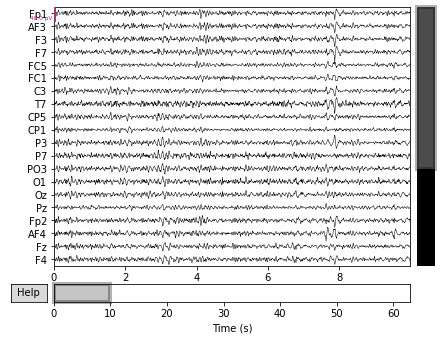

Effective window size : 16.000 (s)


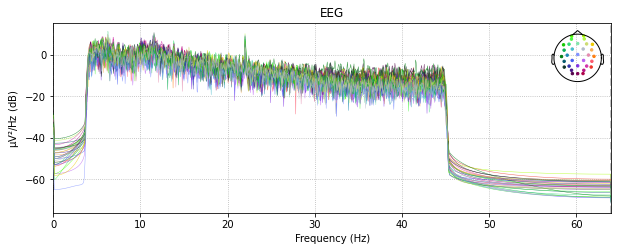

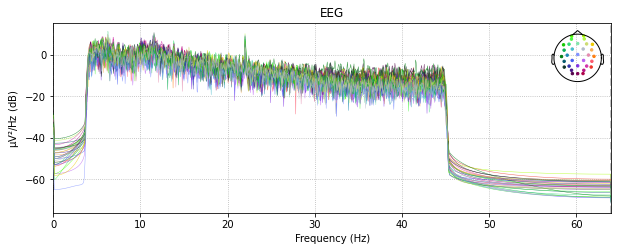

In [65]:
import mne
def numpy_to_raw(data, sample_rate, ch_names, unit = 'u'):
    if(unit==''):
        multiplyer = 1
    elif(unit == 'u'):
        multiplyer = 1e-6
    else:
        raise ValueError(f"unit can only be ['u']")
    
    ch_types = ['eeg'] * len(ch_names)
    ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')

    info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sample_rate,)# verbose=False)

    raw = mne.io.RawArray(data * multiplyer, info,)# verbose=False)
    raw.set_montage(ten_twenty_montage)
    return raw

ch_names = ["Fp1","AF3","F3","F7","FC5","FC1","C3","T7","CP5","CP1","P3","P7","PO3","O1","Oz","Pz","Fp2","AF4","Fz","F4","F8","FC6","FC2","Cz","C4","T8","CP6","CP2","P4","P8","PO4","O2"]

unit = 'u'
sample_rate = 128 #hz
trial_index = 0
raw = numpy_to_raw(data=data['data'][trial_index,:len(ch_names),:], sample_rate=sample_rate, ch_names=ch_names, unit=unit)
print(raw)
raw.plot()
raw.plot_psd()
